# Model Tesla Options and GARCH

The goal of this notebook is to make a good prediction of what the average volatility will be in some horizon. We will use this volatility to predict opion prices for the Tesla stock and see if they deviate much from what the option price under Black Scholes would yield, if we used the volatility just the initial time. We get the data from yahoo finance.

The GARCH(p,q) model states as:

$$x_t= \varepsilon _t \sigma $$

$$\sigma ^2= a _0 + \sum \limits _{i = 1} ^p a_i x^2 _{t - p} + \sum \limits _{i = 1} ^p b_i \sigma^2 _{t - i} $$

In [1]:
import numpy as np
from random import gauss
import datetime
import yfinance as yf
import pandas as pd
import matplotlib .pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Get Data

In [2]:
tesla = yf.Ticker("TSLA")
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime.now().date()
data = tesla.history(start=start_date, end=end_date)

In [3]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,28.299999,28.713333,28.114000,28.684000,142981500,0.0,0.0
2020-01-03 00:00:00-05:00,29.366667,30.266666,29.128000,29.534000,266677500,0.0,0.0
2020-01-06 00:00:00-05:00,29.364668,30.104000,29.333332,30.102667,151995000,0.0,0.0
2020-01-07 00:00:00-05:00,30.760000,31.441999,30.224001,31.270666,268231500,0.0,0.0
2020-01-08 00:00:00-05:00,31.580000,33.232666,31.215334,32.809334,467164500,0.0,0.0
...,...,...,...,...,...,...,...
2025-08-06 00:00:00-04:00,307.890015,320.470001,306.929993,319.910004,78523600,0.0,0.0
2025-08-07 00:00:00-04:00,319.790009,322.399994,316.160004,322.269989,66658700,0.0,0.0
2025-08-08 00:00:00-04:00,321.429993,335.149994,320.980011,329.649994,91200300,0.0,0.0


In [4]:
# We use the average of High and Low for each day to get a datapoint for each day
dates = data.index
highs = data["High"].to_numpy()
lows = data["Low"].to_numpy()
values = (highs + lows)/2
np.isnan(values).any()


np.False_

In [5]:
numValues = values.shape[0]
# We compute the historical volatility, by taking the standard deviation of N consecutive days
N = 3
dates = dates[N -1:]
N_consec_Days = np.zeros((numValues - N +1, N ))

for i in range(N):
    N_consec_Days[:, i] = values[i: numValues- (N -i)+1]

vol_historic_as_std_N_Days = np.var(N_consec_Days, axis = 1)

hist_vol = vol_historic_as_std_N_Days

# vol_historic_LogReturns = np.log(np.maximum(values[:-1] / values[1:], values[1:] / values[:-1]))

C:\Users\seand\AppData\Local\Temp\ipykernel_2500\3738410109.py:2: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, hist_vol, 'b')


Text(0.5, 1.0, 'Historical Volatility for Tesla stock')

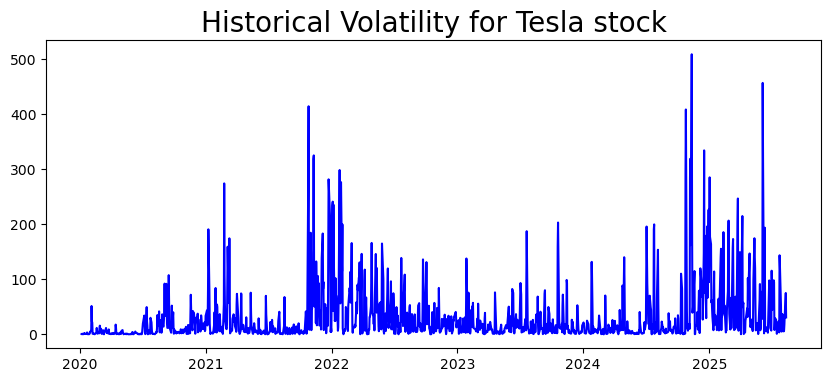

In [6]:
plt.figure(figsize=(10,4))
plt.plot_date(dates, hist_vol, 'b')
plt.title('Historical Volatility for Tesla stock', fontsize=20)

## PACF plot

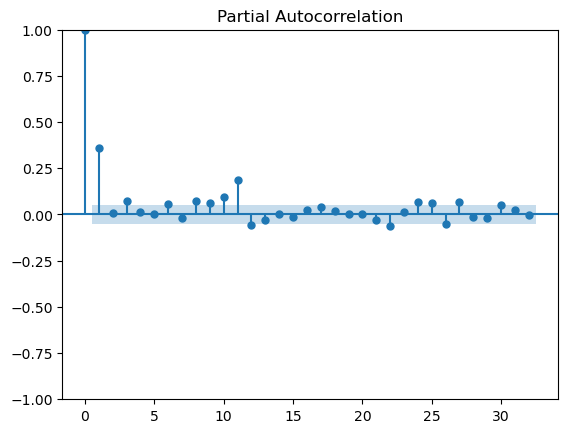

In [7]:
plot_pacf(np.array(hist_vol)**2)
plt.show()

Let's start with a GARCH(3,3) model and see what happens.

## GARCH(3,3)

In [8]:
model = arch_model(hist_vol, p=3, q=3)

In [9]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 9759.117252977983
Iteration:      2,   Func. Count:     20,   Neg. LLF: 11632.912990774475
Iteration:      3,   Func. Count:     32,   Neg. LLF: 7304.271635362899
Iteration:      4,   Func. Count:     42,   Neg. LLF: 7169.409319140286
Iteration:      5,   Func. Count:     52,   Neg. LLF: 7127.4081278905705
Iteration:      6,   Func. Count:     61,   Neg. LLF: 7335.077773515952
Iteration:      7,   Func. Count:     72,   Neg. LLF: 7141.137943088199
Iteration:      8,   Func. Count:     82,   Neg. LLF: 7121.209293044436
Iteration:      9,   Func. Count:     91,   Neg. LLF: 7120.2683022389965
Iteration:     10,   Func. Count:    100,   Neg. LLF: 7115.769485184195
Iteration:     11,   Func. Count:    109,   Neg. LLF: 7111.479654950197
Iteration:     12,   Func. Count:    118,   Neg. LLF: 7106.466878008534
Iteration:     13,   Func. Count:    127,   Neg. LLF: 7102.6155449313155
Iteration:     14,   Func. Count:    136,   Neg. LLF: 7101.7

In [10]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7101.44
Distribution:                  Normal   AIC:                           14218.9
Method:            Maximum Likelihood   BIC:                           14260.9
                                        No. Observations:                 1408
Date:                Wed, Aug 13 2025   Df Residuals:                     1407
Time:                        15:04:03   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            13.0218      2.301      5.659  1.526e-08 [  8.512, 17.532]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega        138.5935     81.680      1.697  8.974e-02 [-21.497,2.987e+02]
alpha[1]       0.4021      0.186      2.163  3.053e-02 [3.778e-02,  0.767]
alpha[2]   1.7434e-09      0.188  9.274e-09      1.000   [ -0.368,  0.368]
alpha[3]   1.4487e-09      0.303  4.786e-09      1.000   [ -0.593,  0.593]
beta[1]    6.8449e-09      0.386  1.774e-08      1.000   [ -0.756,  0.756]
beta[2]        0.3672      0.282      1.300      0.194   [ -0.186,  0.921]
beta[3]        0.2306      0.185      1.247      0.212   [ -0.132,  0.593]
==========================================================================

Covariance estimator: robust
"""

Seems like GARCH(3,3) was an overfit (see P values). We should try ARCH(1)

## ARCH(1)

In [11]:
model = arch_model(hist_vol, p=1, q=0)

In [12]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 7284.651292683362
Iteration:      2,   Func. Count:      9,   Neg. LLF: 164231.7060437508
Iteration:      3,   Func. Count:     15,   Neg. LLF: 7257.105734473612
Iteration:      4,   Func. Count:     19,   Neg. LLF: 7257.081786575539
Iteration:      5,   Func. Count:     23,   Neg. LLF: 7257.067944884704
Iteration:      6,   Func. Count:     27,   Neg. LLF: 7256.993746349305
Iteration:      7,   Func. Count:     31,   Neg. LLF: 7256.851091367576
Iteration:      8,   Func. Count:     35,   Neg. LLF: 7256.515709274949
Iteration:      9,   Func. Count:     39,   Neg. LLF: 7255.897774107792
Iteration:     10,   Func. Count:     43,   Neg. LLF: 7254.7478981785625
Iteration:     11,   Func. Count:     47,   Neg. LLF: 7252.507046008626
Iteration:     12,   Func. Count:     51,   Neg. LLF: 7248.116989845025
Iteration:     13,   Func. Count:     55,   Neg. LLF: 7242.504388119538
Iteration:     14,   Func. Count:     59,   Neg. LLF: 7236.4010

In [13]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7233.16
Distribution:                  Normal   AIC:                           14472.3
Method:            Maximum Likelihood   BIC:                           14488.1
                                        No. Observations:                 1408
Date:                Wed, Aug 13 2025   Df Residuals:                     1407
Time:                        15:04:03   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            14.5881      2.889      5.050  4.429e-07 [  8.926, 20.250]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega        985.5403    255.858      3.852  1.172e-04 [4.841e+02,1.487e+03]
alpha[1]       1.0000      0.272      3.674  2.389e-04     [  0.467,  1.533]
============================================================================

Covariance estimator: robust
"""

This now looks good. But let's also try GARCH(1,2)

## GARCH(1,2)

In [42]:
model = arch_model(hist_vol, p=1, q=2)

In [43]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 9647.998443319932
Iteration:      2,   Func. Count:     14,   Neg. LLF: 19949534.22421068
Iteration:      3,   Func. Count:     23,   Neg. LLF: 7126.750679120501
Iteration:      4,   Func. Count:     29,   Neg. LLF: 8525.031059691333
Iteration:      5,   Func. Count:     37,   Neg. LLF: 7163.992802361411
Iteration:      6,   Func. Count:     44,   Neg. LLF: 7124.024925564649
Iteration:      7,   Func. Count:     50,   Neg. LLF: 7122.466829255024
Iteration:      8,   Func. Count:     56,   Neg. LLF: 7118.158092988166
Iteration:      9,   Func. Count:     62,   Neg. LLF: 7113.370861179676
Iteration:     10,   Func. Count:     68,   Neg. LLF: 7110.127203826952
Iteration:     11,   Func. Count:     74,   Neg. LLF: 7109.775186280515
Iteration:     12,   Func. Count:     80,   Neg. LLF: 7109.727724608526
Iteration:     13,   Func. Count:     86,   Neg. LLF: 7109.712542631903
Iteration:     14,   Func. Count:     92,   Neg. LLF: 7109.71030

In [44]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7109.71
Distribution:                  Normal   AIC:                           14229.4
Method:            Maximum Likelihood   BIC:                           14255.7
                                        No. Observations:                 1408
Date:                Wed, Aug 13 2025   Df Residuals:                     1407
Time:                        15:07:45   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            13.1370      2.150      6.109  1.004e-09 [  8.922, 17.352]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega        114.7874     69.154      1.660  9.694e-02  [-20.753,2.503e+02]
alpha[1]       0.3447  9.498e-02      3.629  2.842e-04    [  0.159,  0.531]
beta[1]        0.0273  4.866e-02      0.561      0.575 [-6.808e-02,  0.123]
beta[2]        0.6280      0.105      5.968  2.396e-09    [  0.422,  0.834]
===========================================================================

Covariance estimator: robust
"""

It seems like we should include the betas up to order 2 in our model after all!

## Rolling Forcast For Evaluation

In [47]:
rolling_predictions = []
test_size = 100
predictionHorizon = 3
numItterations = test_size//predictionHorizon + int(np.ceil(test_size/predictionHorizon - test_size//predictionHorizon).item())

for i in range(numItterations):
    train = hist_vol[:-(test_size-i)]
    model = arch_model(train, p=1, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=predictionHorizon)
    rolling_predictions = rolling_predictions + np.sqrt(pred.variance.values[0,:]).tolist()

In [48]:
rolling_predictions = pd.Series(rolling_predictions[:test_size], index=dates[-test_size:])

C:\Users\seand\AppData\Local\Temp\ipykernel_2500\2943803893.py:2: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, hist_vol, 'b')


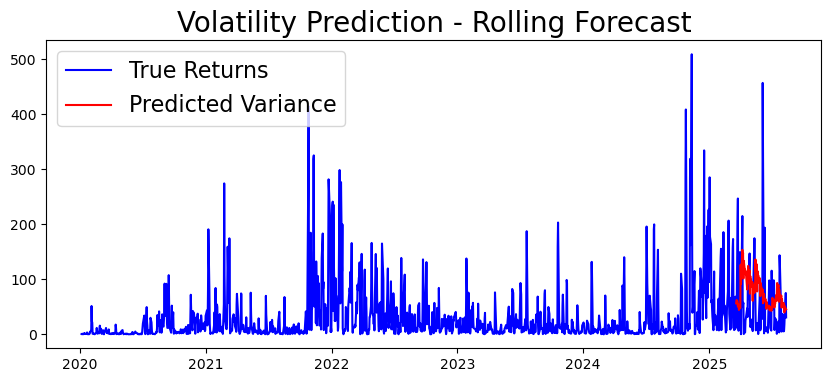

In [49]:
plt.figure(figsize=(10,4))
plt.plot_date(dates, hist_vol, 'b')
preds, = plt.plot(rolling_predictions, "r")
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Variance'], fontsize=16)

In [50]:
np.linalg.norm(rolling_predictions.to_numpy() - hist_vol[-test_size:])

np.float64(800.0322299632305)

## Naive Predictor where we set the volatility of today equal to the volatility of the next few days

In [51]:
rolling_predictions_Naive = []
test_size = 100
predictionHorizon = 3
numItterations = test_size//predictionHorizon + int(np.ceil(test_size/predictionHorizon - test_size//predictionHorizon).item())

for i in range(numItterations):
    train = hist_vol[:-(test_size-i)]
    predNaive = [hist_vol[-(test_size-i)].item()]*predictionHorizon
    rolling_predictions_Naive = rolling_predictions_Naive + predNaive

In [52]:
rolling_predictions_Naive = pd.Series(rolling_predictions_Naive[:test_size], index=dates[-test_size:])

C:\Users\seand\AppData\Local\Temp\ipykernel_2500\1497863642.py:2: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, hist_vol, 'b')


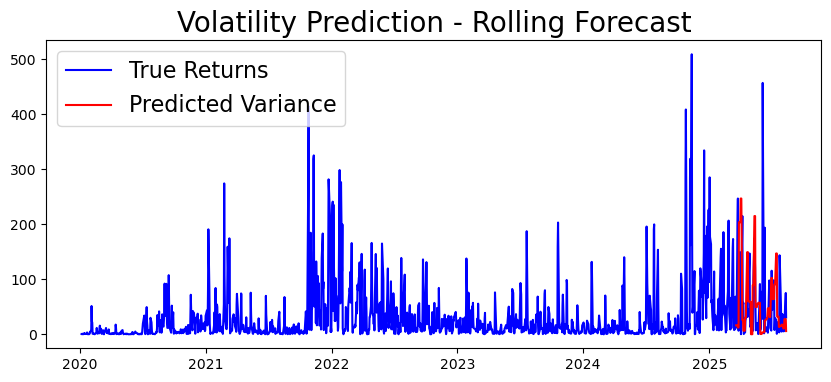

In [53]:
plt.figure(figsize=(10,4))
plt.plot_date(dates, hist_vol, 'b')
preds, = plt.plot(rolling_predictions_Naive, "r")
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Variance'], fontsize=16)

In [54]:
np.linalg.norm(rolling_predictions_Naive.to_numpy() - hist_vol[-test_size:])

np.float64(930.5392541299163)

#### Recap of what we did so far:

We used the volatility of a day to compute the volatility 3 days in advance. This performed slightly better than just using the volatility from the day prior as estimator for 3 days in advance. We saw, that our GARCH(1,2) model performed better, than just a naive estimator measured in terms of the erros for each day in L2 norm.

## Pricing Tesla Options under Black Scholes with predicted volatility